## Best Practices for Data Preprocessing

#### Always Explore & Visualize Data First

Summary Statistics:
              Age        Salary Department
count    6.000000      6.000000          7
unique        NaN           NaN          3
top           NaN           NaN         HR
freq          NaN           NaN          3
mean    30.166667  59500.000000        NaN
std      6.554896   8893.818078        NaN
min     22.000000  50000.000000        NaN
25%     26.000000  53500.000000        NaN
50%     29.500000  59000.000000        NaN
75%     33.750000  61500.000000        NaN
max     40.000000  75000.000000        NaN


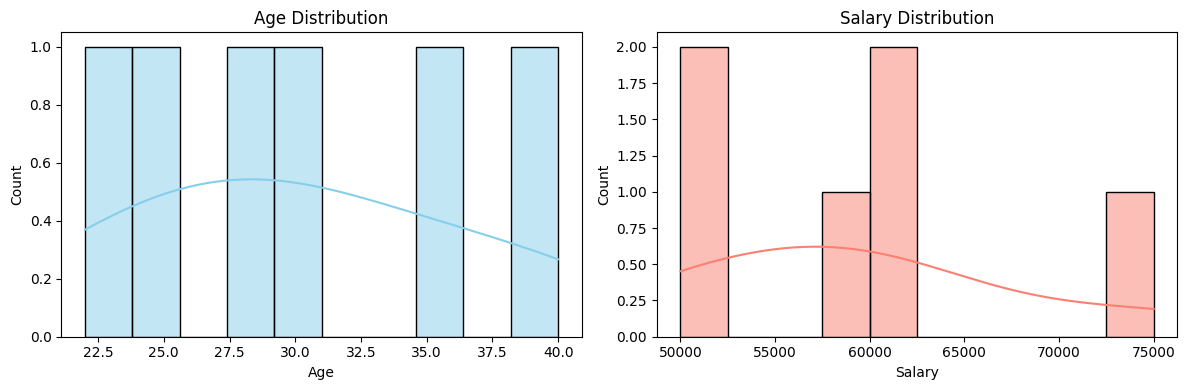


Missing Values in Each Column:
Age           1
Salary        1
Department    0
dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = {
    'Age': [25, 30, 22, 35, 29, None, 40],
    'Salary': [50000, 60000, 52000, 75000, 62000, 58000, None],
    'Department': ['Sales', 'Engineering', 'HR', 'Engineering', 'Sales', 'HR', 'HR']
}
df = pd.DataFrame(data)

# Task 1: Summary Statistics
print("Summary Statistics:")
print(df.describe(include='all'))

# Task 2: Visualize Data Distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=10, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Salary'], kde=True, bins=10, color='salmon')
plt.title('Salary Distribution')

plt.tight_layout()
plt.show()

# Task 3: Checking for Null Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


## Handle Missing & Inconsistent Data Before Applying ML Models

In [2]:
import pandas as pd
import numpy as np

# Sample dataset with missing values and outliers
data = {
    'Age': [25, 30, 22, 35, 29, None, 40, 100],  # 100 is an outlier
    'Salary': [50000, 60000, 52000, 75000, 62000, 58000, None, 300000]  # 300000 is an outlier
}
df = pd.DataFrame(data)

print("Original Data:")
print(df)

# Task 4: Drop Missing Values
df_dropped = df.dropna()
print("\nAfter Dropping Missing Values:")
print(df_dropped)

# Task 5: Fill Missing Values (mean imputation)
df_filled = df.copy()
df_filled['Age'].fillna(df_filled['Age'].mean(), inplace=True)
df_filled['Salary'].fillna(df_filled['Salary'].mean(), inplace=True)
print("\nAfter Filling Missing Values:")
print(df_filled)

# Task 6: Handling Outliers with Capping (IQR Method)
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    return series.clip(lower=lower_cap, upper=upper_cap)

df_capped = df_filled.copy()
df_capped['Age'] = cap_outliers(df_capped['Age'])
df_capped['Salary'] = cap_outliers(df_capped['Salary'])

print("\nAfter Outlier Capping:")
print(df_capped)


Original Data:
     Age    Salary
0   25.0   50000.0
1   30.0   60000.0
2   22.0   52000.0
3   35.0   75000.0
4   29.0   62000.0
5    NaN   58000.0
6   40.0       NaN
7  100.0  300000.0

After Dropping Missing Values:
     Age    Salary
0   25.0   50000.0
1   30.0   60000.0
2   22.0   52000.0
3   35.0   75000.0
4   29.0   62000.0
7  100.0  300000.0

After Filling Missing Values:
          Age         Salary
0   25.000000   50000.000000
1   30.000000   60000.000000
2   22.000000   52000.000000
3   35.000000   75000.000000
4   29.000000   62000.000000
5   40.142857   58000.000000
6   40.000000   93857.142857
7  100.000000  300000.000000

After Outlier Capping:
         Age         Salary
0  25.000000   50000.000000
1  30.000000   60000.000000
2  22.000000   52000.000000
3  35.000000   75000.000000
4  29.000000   62000.000000
5  40.142857   58000.000000
6  40.000000   93857.142857
7  58.089286  114535.714286


/tmp/ipykernel_6522/958941947.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled['Age'].fillna(df_filled['Age'].mean(), inplace=True)
/tmp/ipykernel_6522/958941947.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

## Choose the Right Scaling Method

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler

# Sample dataset
data = {
    'Feature1': [10, 15, 20, 25, 1000],  # Has outlier
    'Feature2': [1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)
print("Original Data:")
print(df)

# Task 7: Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)
print("\nMin-Max Scaled Data:")
print(df_minmax)

# Task 8: Robust Scaling
robust_scaler = RobustScaler()
df_robust = pd.DataFrame(robust_scaler.fit_transform(df), columns=df.columns)
print("\nRobust Scaled Data:")
print(df_robust)

# Task 9: MaxAbs Scaling
maxabs_scaler = MaxAbsScaler()
df_maxabs = pd.DataFrame(maxabs_scaler.fit_transform(df), columns=df.columns)
print("\nMaxAbs Scaled Data:")
print(df_maxabs)


Original Data:
   Feature1  Feature2
0        10         1
1        15         2
2        20         3
3        25         4
4      1000         5

Min-Max Scaled Data:
   Feature1  Feature2
0  0.000000      0.00
1  0.005051      0.25
2  0.010101      0.50
3  0.015152      0.75
4  1.000000      1.00

Robust Scaled Data:
   Feature1  Feature2
0      -1.0      -1.0
1      -0.5      -0.5
2       0.0       0.0
3       0.5       0.5
4      98.0       1.0

MaxAbs Scaled Data:
   Feature1  Feature2
0     0.010       0.2
1     0.015       0.4
2     0.020       0.6
3     0.025       0.8
4     1.000       1.0


## Keep Track of Data Transformations for Reproducibility

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import json
import datetime

# Sample data
data = {'Age': [25, 30, 22, 35, 29], 'Income': [50000, 60000, 52000, 75000, 62000]}
df = pd.DataFrame(data)

# Task 10: Log Data Preprocessing Steps
log = []

def log_step(step_name, details):
    log_entry = {
        'timestamp': datetime.datetime.now().isoformat(),
        'step': step_name,
        'details': details
    }
    log.append(log_entry)

# Example preprocessing: StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

log_step("Standard Scaling", {
    'features': list(df.columns),
    'method': 'StandardScaler',
})

# Task 11: Store Transformation Parameters
params = {
    'mean': scaler.mean_.tolist(),
    'scale': scaler.scale_.tolist(),
    'features': df.columns.tolist()
}

# Saving logs and parameters to JSON (can write to files if needed)
log_json = json.dumps(log, indent=2)
params_json = json.dumps(params, indent=2)

print("📘 Preprocessing Log:")
print(log_json)

print("\n⚙️ Stored Parameters:")
print(params_json)


📘 Preprocessing Log:
[
  {
    "timestamp": "2025-05-14T10:06:31.988083",
    "step": "Standard Scaling",
    "details": {
      "features": [
        "Age",
        "Income"
      ],
      "method": "StandardScaler"
    }
  }
]

⚙️ Stored Parameters:
{
  "mean": [
    28.2,
    59800.0
  ],
  "scale": [
    4.445222154178573,
    8863.407922464135
  ],
  "features": [
    "Age",
    "Income"
  ]
}
